# Übungszettel 10: Logistische Regression und Evaluation (Musterlösung)

## Maschinelles Lernen - WiSe 23/24

### Abgabe 17.01.2024, 23:55 Uhr

*Hinweise:*
- Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet.**
- **<span style="color:red;">Es werden auf diesem Übungszettel die letzten zwei Aufgaben bewertet</span>**, die übrigen Aufgaben dienen zur selbstständigen Vertiefung des Vorlesungsstoffs. Für diese Aufgaben werden nach der Abgabe Musterlösungen bereitgestellt.
- Die Lösungen sollen in diesem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
- Für die Abgabe sollen Sie dieses IPython Notebook und ggf. zugehörige Dateien in ein **Ziparchiv** packen und im Ilias hochladen. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben und Umlaute ggf. ersetzt werden sollen. Bei Nichtbefolgung dieser Vorgabe können Punkte abgezogen werden.

---
## Aufgabe 1: Logistische Regression

In dieser Aufgabe betrachten wir die logistische Regression mit Hypothese 
$$ h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$$
und 
$$ \theta = \begin{bmatrix} \theta_0 \\
 \theta_1\\
 \vdots \\ \theta_n \end{bmatrix} 
 $$

a) Zeigen Sie, dass 
$$
\frac{\partial J(\theta)}{\partial\theta_j} = \dfrac{1}{m}\sum_{i=1}^m (h_\theta(x_i) - y_i)x_i
$$
für die logistische Regression mit Cross-Entropy Loss 
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^m y_i\log(h_\theta(x_i))+(1-y_i)(\log(1-h_\theta(x_i))
$$

Wir zeigen zunächst, dass für die Sigmoid-Funktion $ \sigma (x) = \frac{1}{1+e^{-x}} $ gilt, dass $\sigma' = \sigma(1-\sigma)$:

$$
\sigma(x)' = \frac{-e^{-x}}{{1+e^{-x}}^2} = \sigma(x) \left(\frac{-e^{-x}}{1+e^{-x}}\right) = \sigma(x) \left(1- \frac{1+e^{-x}}{1+e^{-x}} - \frac{-e^{-x}}{1+e^{-x}} \right) = \sigma(x) \left(1- \frac{1}{1+e^{-x}} \right) = \sigma(x) (1-\sigma(x)) \tag{1}
$$



Wir berechnen nun $\frac{\partial J(\theta)}{\partial\theta_j} $ mit $ J(\theta) = -\frac{1}{m} \sum_{i=1}^m y_i\log(h_\theta(x_i))+(1-y_i)(\log(1-h_\theta(x_i)) = -\frac{1}{m} \sum_{i=1}^m \textrm{Cost}(h_\theta(x_i), y_i) $


Für $y=1$ gilt:

$$ \frac{\partial \textrm{Cost}(h_\theta(x_i), y_i)}{\partial\theta_j} = \frac{\partial \textrm{log}(h_\theta(x_i))}{\partial\theta_j} \\
= \frac{1}{h_\theta(x_i)} \cdot \frac{\partial h_\theta(x_i)}{\partial \theta_j}$$

Es gilt:

$$ (h_\theta (x_i))' = (\sigma(\theta^T x_i))' \\
\stackrel{(1)}{=} \sigma(\theta^T x_i) (1 - \sigma(\theta^T x_i)) \cdot (\theta^T x_i)' \\
= h_\theta(x_i) (1 - h_\theta(x_i)) \cdot (\theta^T x_i)' $$

Damit folgt

$$ \frac{\partial \textrm{Cost}(h_\theta(x_i), y_i)}{\partial\theta_j} = (1 - h_\theta(x_i)) \frac{\partial \theta^T x_i }{\partial \theta_j } $$

$$ \frac{\partial \theta^T x_i }{\partial \theta_j } = \dots + (\theta_j x_{ij})' + \dots = x_{ij} $$

$$ \Rightarrow \frac{\partial \textrm{Cost}(h_\theta(x_i), y_i)}{\partial\theta_j} =  (1 - h_\theta(x_i)) x_{ij} $$

Für $y = 0$ gilt analog:

$$ \frac{\partial \textrm{Cost}(h_\theta(x_i), y_i)}{\partial\theta_j} = \frac{\partial \textrm{log}(1-h_\theta(x_i))}{\partial\theta_j} = \frac{1}{1 - h_\theta(x_i)} \cdot \frac{\partial (1 - h_\theta(x_i))}{\partial \theta_j} = - h_\theta(x_i) x_{ij} $$

Daraus folgt nun

$$ \frac{\partial J(\theta)}{\partial\theta_j} = - \frac{1}{m} \sum_{i=1}^m \left ( y_i (1 - h_\theta(x_i)) - (1 - y_i) h_\theta(x_i) \right ) x_{ij} \\ 
= - \frac{1}{m} \sum_{i=1}^m \left ( y_i - y_i h_\theta(x_i) - h_\theta(x_i) + y_i h_\theta(x_i) \right ) x_{ij} \\ 
= - \frac{1}{m} \sum_{i=1}^m \left ( y_i - h_\theta(x_i) \right ) x_{ij} \\
= \frac{1}{m} \sum_{i=1}^m \left ( h_\theta(x_i) - y_i  \right ) x_{ij} $$
$\square$

b) Zeigen Sie, dass 
$$
\frac{\partial J(\theta)}{\partial\theta_j} = \dfrac{1}{m}\sum_{i=1}^m (h_\theta(x_i) - y_i)x_i + \frac{\lambda}{m}\theta_j
$$
für die logistische Regression mit Cross-Entropy Loss mit Regularisierung
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^m y_i\log(h_\theta(x_i))+(1-y_i)(\log(1-h_\theta(x_i)) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^2
$$ 


In a) wurde bereits gezeigt, dass $\frac{\partial J(\theta)}{\partial\theta_j} =  \dfrac{1}{m} \sum_{i=1}^m (h_\theta(x_i) - y_i)x_i $ gilt. Es bleibt also zu zeigen, dass $ \frac{\partial}{\partial \theta_j} \frac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^2 = \frac{\lambda}{m}\theta_j $ gilt:


$$ \frac{\partial}{\partial \theta_j} \frac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^2 \\
=  \frac{\lambda}{2m} \frac{\partial \sum_{l=1}^n \theta_{l}^2}{\partial \theta_j} \\
= \frac{\lambda}{2m} \sum_{l=1}^n \frac{\partial \theta_{l}^2}{\partial \theta_j} \\
= \frac{\lambda}{2m} 2 \theta_{j} 
= \frac{\lambda}{m} \theta_{j} $$
$\square$

---
## **Aufgabe 2: Evaluation (bewertet: 1,5+0,5+1+1+1 Punkte)**

Stellen Sie sich vor, dass Sie an einem Spam-Erkennungssystem arbeiten. Bei dem Problem der Spamerkennung handelt es sich um ein binäres Klassifikationsproblem, bei dem *Spam* die positive Klasse und *kein Spam* die negative Klasse ist. 

Nehmen Sie an, dass sie 2 Modelle (*Modell A* und *Modell B*) trainiert haben und wollen diese nun bewerten. Dazu existiert ein gelabelter Testdatensatz *D* mit E-Mails, die entweder Spam sind, oder nicht.

Der folgende Beispielcode läd die Vorhersagen der Modelle (*predictions*) auf beiden Datensätzen, sowie die Labels des Testdatensatzes (*ground truth*). Dabei ist jede Vorhersage ein Wahrscheinlichkeitswert zwischen 0 und 1, und jedes Groundtruth-Label ist entweder 0 (kein Spam) oder 1 (Spam).

In [2]:
import numpy as np
import pickle as pkl

# Dataset
gt = pkl.load(open('data.pkl','rb'))

# Predictions
pr_a, pr_b = pkl.load(open('predictions.pkl','rb'))

Ein Modell kann als binäre Klassifizierer genutzt werden, indem ein Grenzwert für die vorhergesagte Wahrscheinlichkeit festgelegt wird, ab dem eine E-Mail als Spam klassifiziert wird. 

Betrachten Sie die Vorhersagen von Modell A und B auf dem Testdatensatz. Eine E-Mail soll als "Spam" klassifiziert werden, wenn das Modell eine Wahrscheinlichkeit > 0.5 ausgibt. 

a) Berechnen Sie zunächst die true positives (TP), false positives (FP), true negatives (TN) und false negatives (FN).

Beurteilen Sie nun die Qualität des binären Klassifikators, indem sie die folgenden Gütemaße basierend auf den ermittelten TP, FP, TN und FN berechnen:

* Recall (auch Sensitivität oder true positive rate)
* Precision (auch Genauigkeit)
* Accuracy (auch Treffergenauigkeit)

In [3]:
def evaluate_model(gt, pr, split_point):

    gt_class = gt > split_point
    pr_class = pr > split_point
    
    gt_class & pr_class
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for (g,p) in zip(gt_class, pr_class):
        if g and p:
            tp += 1
        if not g and not p:
            tn += 1
        if not g and p:
            fp += 1
        if g and not p:
            fn += 1
    
    return tp,tn,fp,fn

In [4]:
def calc_metrics(gt, pr, split_point):
    tp, tn, fp, fn = evaluate_model(gt, pr, split_point)
    
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    
    f_score = (2*precision*recall)/(precision+recall)
    
    return recall, precision, accuracy, f_score

In [5]:
split_point = 0.5

recall_a, precision_a, accuracy_a, fscore_a = calc_metrics(gt, pr_a, split_point)
print("Model A: \n  Recall: {:.3f}, Precision: {:.3f}, Accuracy: {:.3f}".format(recall_a, precision_a, accuracy_a))

recall_b, precision_b, accuracy_b, fscore_b = calc_metrics(gt, pr_b, split_point)
print("Model B: \n  Recall: {:.3f}, Precision: {:.3f}, Accuracy: {:.3f}".format(recall_b, precision_b, accuracy_b))

Model A: 
  Recall: 0.942, Precision: 0.938, Accuracy: 0.940
Model B: 
  Recall: 0.841, Precision: 0.856, Accuracy: 0.850


b) Wie könnte ein Modell auf einfache Weise einen Recall von 1 bzw. 100% erreichen?

Das Modell müsste immer die Klasse 1 voraussagen

In [6]:
recall_c, precision_c, accuracy_c, _ = calc_metrics(gt, np.array([1 for _ in gt]), split_point)
print("Model Always1: \n  Recall: {:.3f}, Precision: {:.3f}, Accuracy: {:.3f}".format(recall_c, precision_c, accuracy_c))

Model Always1: 
  Recall: 1.000, Precision: 0.498, Accuracy: 0.498


c) Beschreiben Sie den Vorteil des F-Measure und berechnen Sie diesen für die Vorhersagen von Modell A und B auf dem Testdatensatz D.

In den F-Measure fließen sowohl Precision als auch Recall ein. Ein hoher F-Score gibt an, dass das Modell sowohl eine hohe Precision als auch einen hohen Recall besitzt. Der F-Score hat oftmals eine bessere Aussagekraft als die Betrachtung des Mittelwertes von Precision und Recall.

In [7]:
print("Model A: \n  F-Score: {:.3f}".format(fscore_a))
print("Model B: \n  F-Score: {:.3f}".format(fscore_b))

Model A: 
  F-Score: 0.940
Model B: 
  F-Score: 0.848


d) Die ROC-Kurve (receiver operating characteristic) ist ein zweidimensionaler Graph, in dem die Falsch-Positiv-Rate auf der X-Achse und die Richtig-Positiv-Rate auf der Y-Achse abgetragen werden. Mit einer ROC Kurve kann die Performance eines binären Klassifizierers visuell beurteilt werden. 

Plotten Sie die ROC-Kurven für die Vorhersagen von Modell A und B auf dem Testdatensatz D und beschreiben Sie die Plots. Berechnen Sie auch die AUC (area under curve). Welches Modell ist besser?

In [8]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [9]:
def plot_roc_curve(gt, pr, ax):
    fpr, tpr, thresholds = roc_curve(gt, pr)
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

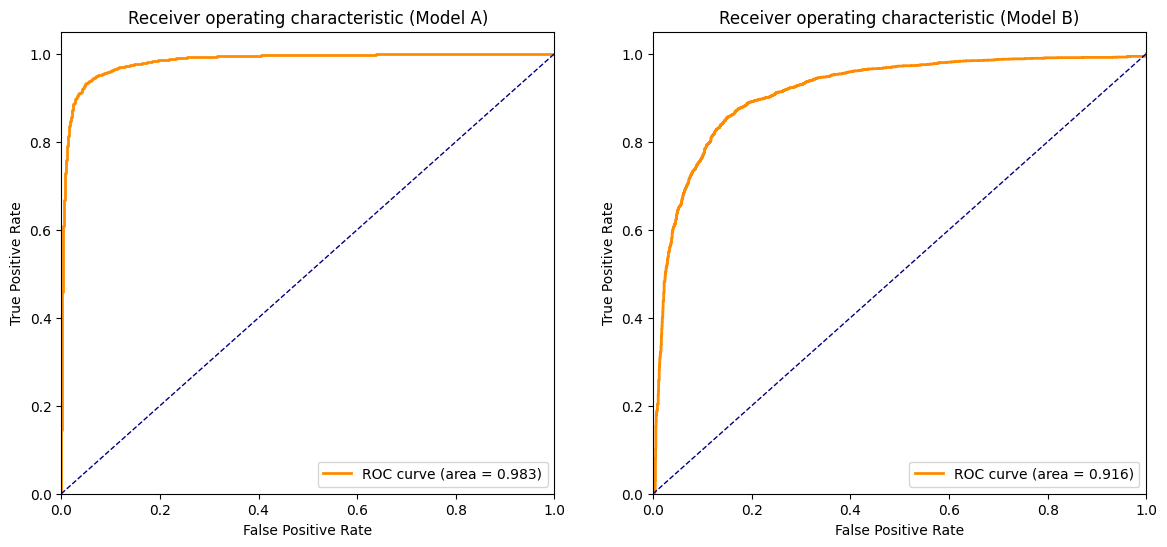

In [10]:
%matplotlib inline
fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize=(14,6))

plot_roc_curve(gt, pr_a, ax_l)
ax_l.set_title('Receiver operating characteristic (Model A)')

plot_roc_curve(gt, pr_b, ax_r)
ax_r.set_title('Receiver operating characteristic (Model B)')

plt.show()

Bei Modell A steigt die True-Positive-Rate deutlich schneller an als bei Modell B und auch die AOC ist etwas größer. Also sind die Predictions von Modell A besser als die von Modell B.

e) Plotten Sie nun auch die Recall-Precision Kurve für die Vorhersagen von Modell A und B auf dem Testdatensatz D und beschreiben Sie die Plots. Berechnen Sie jeweils auch die AUC.

In [11]:
def plot_roc_curve(gt, pr, ax):
    pr, re, thresholds = precision_recall_curve(gt, pr)
    prc_auc = auc(re, pr)

    ax.plot(re, pr, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.3f)' % prc_auc)
    #ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc="lower right")

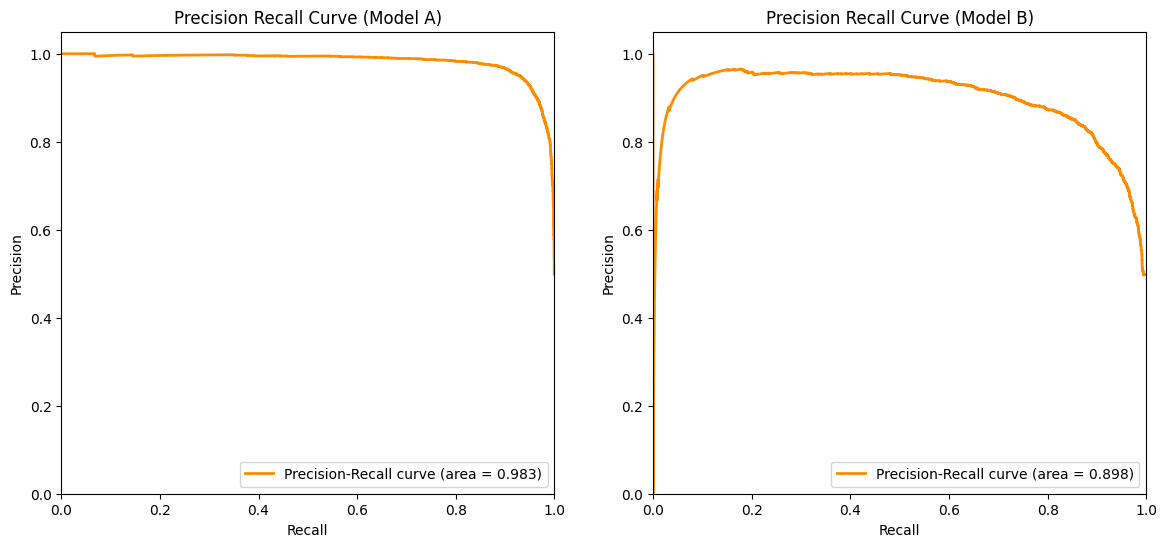

In [12]:
%matplotlib inline
fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize=(14,6))

plot_roc_curve(gt, pr_a, ax_l)
ax_l.set_title('Precision Recall Curve (Model A)')

plot_roc_curve(gt, pr_b, ax_r)
ax_r.set_title('Precision Recall Curve (Model B)')

plt.show()

Die Precision-Recall Kurve von Modell A startet bei einer Precision von 1 bei Recall 0, während die Procision von Modell B auf 0 fällt und erst bei leichtem Anstieg des Recalls auf hohe Precision-Werte kommt. Für hohe Recall-Werte fällt die Precision bei Modell B auch schon früher ab als bei Modell A. Modell A hat auch eine größere AOC als Modell B, insgesamt ist Modell A also das bessere Modell.

---
## **Aufgabe 3: Image-Retrieval (bewertet: 1,5+0,5 Punkte)**

In dieser Aufgabe soll ein Modell ausgewertet werden, das 3 Objektklassen auf Bildern erkennen soll. Auf einem Bild können dabei auch mehrere Klassen vorkommen. Gegeben sei folgender annotierter Testdatensatz:


| Bild-ID | Person | Auto | Hund |
| :------:|:------:|:----:| ----:|
| 1       | 1      |1     | 1    |
| 2       | 1      |0     | 0    |
| 3       | 0      |1     | 0    |
| 4       | 0      |0     | 1    |
| 5       | 0      |1     | 1    |

Dabei bedeutet 1, dass die Klasse im Bild vorkommt, und 0, dass die Klasse nicht vorkommt.

Für die 3 Klassen liefert das Modell nun folgende Vorhersagen auf dem Datensatz (jeweils eine Wahrscheinlichkeit, dass die Klasse vorkommt):

| Bild-ID | Person | 
| :------:|:------:|
| 1       | 0,99   |
| 2       | 0,80   |
| 3       | 0,85   |
| 4       | 0,19   |
| 5       | 0,35   |

| Bild-ID | Auto   | 
| :------:|:------:|
| 1       | 0,92   |
| 2       | 0,10   |
| 3       | 0,11   |
| 4       | 0,12   |
| 5       | 0,85   |

| Bild-ID | Hund   | 
| :------:|:------:|
| 1       | 0,92   |
| 2       | 0,10   |
| 3       | 0,12   |
| 4       | 0,90   |
| 5       | 0,85   |

a) Berechnen Sie für jede Klasse die Average Precision (AP) von Hand.

Für welche Klasse funktioniert das Modell am besten, für welche am schlechtesten?

### Lösung von Hand:

### Person
| Bild-ID | Prediction | Groundtruth | Precision@k     | Recall@k        | 
| :------:|:----------:|:-----------:|:---------------:|:---------------:|
| 1       | 0,99       | **1**       | **1/1 = 1**     | **1/2 = 0.5**   |
| 3       | 0,85       | 0           | 1/2 = 0.5       | 1/2 = 0.5       |
| 2       | 0,80       | **1**       | **2/3 = 0.667** | **2/2 = 1**     |
| 5       | 0,35       | 0           | 2/4 = 0.5       | 2/2 = 1         |
| 4       | 0,19       | 0           | 2/5 = 0.4       | 2/2 = 1         |

$$AP_{Person} = \frac{1+0,667}{2} = \frac{1,667}{2} = 0.8333$$

### Auto
| Bild-ID | Prediction | Groundtruth | Precision@k     | Recall@k        | 
| :------:|:----------:|:-----------:|:---------------:|:---------------:|
| 1       | 0,92       | **1**       | **1/1 = 1**     | **1/3 = 0.333** |
| 5       | 0,85       | **1**       | **2/2 = 1**     | **2/3 = 0.667** |
| 4       | 0,12       | 0           | 2/3 = 0.667     | 2/3 = 0.667     |
| 3       | 0,11       | **1**       | **3/4 = 0,75**  | **3/3 = 1**     |
| 2       | 0,10       | 0           | 3/5 = 0.6       | 3/3 = 1         |

$$AP_{Auto} = \frac{1+1+0,75}{3} = \frac{2,75}{3} = 0.9167$$

### Hund
| Bild-ID | Prediction | Groundtruth | Precision@k     | Recall@k        | 
| :------:|:----------:|:-----------:|:---------------:|:---------------:|
| 1       | 0,92       | **1**       | **1/1 = 1**     | **1/3 = 0.333** |
| 4       | 0,90       | **1**       | **2/2 = 1**     | **2/3 = 0.667** |
| 5       | 0,85       | **1**       | **3/3 = 1**     | **3/3 = 1**     |
| 3       | 0,12       | 0           | 3/4 = 0.75      | 3/3 = 1         |
| 2       | 0,10       | 0           | 3/5 = 0.6       | 3/3 = 1         |

$$AP_{Hund} = \frac{1+1+1}{3} =\frac{3}{3} = 1$$


Für die Klasse **Hund** funktioniert das Modell am besten, für die Klasse **Person** am schlechtesten.

In [13]:
# Programmatische Lösung

person_gt = np.array([1,1,0,0,0])
auto_gt = np.array([1,0,1,0,1])
hund_gt = np.array([1,0,0,1,1])

person_pr = np.array([0.99, 0.80, 0.85, 0.19, 0.35])
auto_pr = np.array([0.92, 0.10, 0.11, 0.12, 0.85])
hund_pr = np.array([0.92, 0.10, 0.12, 0.90, 0.85])

In [18]:
def calculate_average_precision(gt, pr):

    p = sum(gt)
    pr_rank = np.argsort(pr)[::-1]

    rel_sum = 0
    precision_sum = 0
    for k,rank_k in enumerate(pr_rank):
        rel_k = gt[rank_k]
        rel_sum += rel_k
        
        precision_k = rel_sum/(k+1)
        precision_sum += precision_k * rel_k
    
    return 1/p * precision_sum

In [19]:
ap_person = calculate_average_precision(person_gt, person_pr)
ap_auto = calculate_average_precision(auto_gt, auto_pr)
ap_hund = calculate_average_precision(hund_gt, hund_pr)

print(f"AP Person: {ap_person:.3f}")
print(f"AP Auto: {ap_auto:.3f}")
print(f"AP Hund: {ap_hund:.3f}")

AP Person: 0.833
AP Auto: 0.917
AP Hund: 1.000


b) Berechnen Sie die mean Average Precision (mAP).

$$mAP = \frac{1}{3} (0.83333 + 0.9167 + 1) = 0.9167$$

In [17]:
aps = [ap_person, ap_auto, ap_hund]
m_ap = 1/len(aps) * sum(aps)

print(f"mAP: {m_ap:.3f}")

mAP: 0.917
